**Task 1:**

You are working for a telecommunications company. The company has collected data on 500 customers, including features like usage duration, monthly charges, and customer feedback. Your task is to build a customer churn prediction model to identify customers who are likely to leave the
service.

• Evaluate your model using Confusion Matrix, Calculate its f1 Score and Plot AUC ROC curve.

• Compare the results of Accuracy Score with TP, TR, FP, FN and briefly discuss in the text cell whether accuracy score measure is effective for your dataset or not.

• Plot the confusion Matrix

• Check whether you have done your preprocessing effectively

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_csv('/content/train(1).csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
data = pd.concat([train_data, test_data])

In [ ]:
data['international_plan'] = data['international_plan'].map({'yes': 1, 'no': 0})
data['voice_mail_plan'] = data['voice_mail_plan'].map({'yes': 1, 'no': 0})
data['churn'] = data['churn'].map({'yes': 1, 'no': 0})

In [ ]:
data = data.drop(columns=['state', 'area_code'])

In [ ]:
data = data.dropna(subset=['churn'])

In [ ]:
X = data.drop('churn', axis=1)
y = data['churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy Score:", acc_score)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Confusion Matrix:
 [[715   6]
 [ 28 101]]
Accuracy Score: 0.96
F1 Score: 0.8559322033898306
ROC AUC Score: 0.9114548054489351


In this dataset, accuracy alone is not a reliable measure due to class imbalance (more non-churners than churners). A high accuracy can result even if the model fails to identify churners effectively. Metrics like F1 score and AUC-ROC provide a better understanding by focusing on both false positives and false negatives. Therefore, accuracy is less effective, and it's crucial to consider other metrics to evaluate model performance accurately.

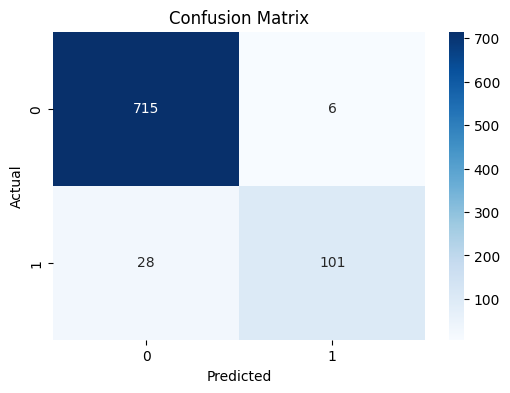

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

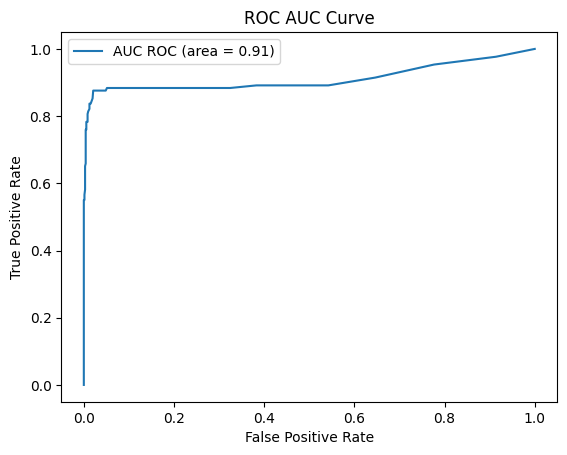

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC ROC (area = {roc_auc:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       721
         1.0       0.94      0.78      0.86       129

    accuracy                           0.96       850
   macro avg       0.95      0.89      0.92       850
weighted avg       0.96      0.96      0.96       850



In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Positives: {tp}, True Negatives: {tn}")
print(f"False Positives: {fp}, False Negatives: {fn}")

True Positives: 101, True Negatives: 715
False Positives: 6, False Negatives: 28


**Task 2:**

You are working on a disease prediction model based on patient health records. The dataset contains 500 patients' data, including symptoms, age, and medical history. The task is to predict whether a
patient has the disease (1) or not (0).

• Split the dataset into a training set (80%) and a testing set (20%).

• Train a random forest and KNN classifier on the training set.

• Calculate and print accuracy, precision, recall, and F1-score on the testing set.

• Using Stratified K-Fold Cross-Validation:
Implement 10-fold stratified cross-validation using a KNN and RF classifier.

• Calculate the average precision across all folds.

• Ensure that the positive class is preserved in each fold.

• Compare the result of mean Validation score with Train Test Split using Accuracy Score.

• Plot ROC AUC Curve for RF with train test split and Cross Validation

Additional Evaluation:

• Use balanced accuracy score and top K Accuracy Score from Sklearn.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
data = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

In [ ]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

In [ ]:
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [ ]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.9703
Precision: 0.9474110032362459
Recall: 0.6888235294117647
F1 Score: 0.797683923705722


In [ ]:
print("\nKNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))


KNN:
Accuracy: 0.95515
Precision: 0.879848628192999
Recall: 0.5470588235294118
F1 Score: 0.6746463547334058


In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
f1_scores_rf = []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = rf.predict(X_test_fold)
    f1_scores_rf.append(f1_score(y_test_fold, y_pred_fold))

print("\nStratified K-Fold - Average F1 Score (Random Forest):", sum(f1_scores_rf) / len(f1_scores_rf))


Stratified K-Fold - Average F1 Score (Random Forest): 0.7948649451917204


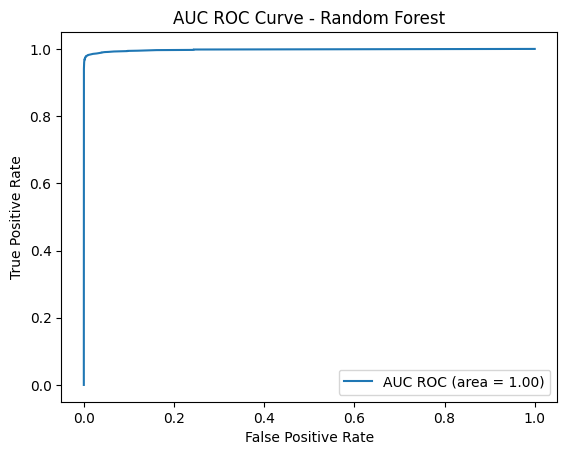

In [ ]:
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC ROC (area = {roc_auc_rf:.2f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve - Random Forest')
plt.legend(loc='best')
plt.show()

**Task 3:**

Imagine you are working for a winery and your task is to build a machine learning model to classify wines into categories based on their quality. The dataset you have contains various features related
to the chemical composition of the wines.

The target variable, 'quality', with higher values indicating better quality. Your goal is to create a model that can accurately predict the quality of wines based
on their features.

Features: Various chemical properties of wines (e.g., alcohol content, acidity, etc.). Target Variable: 'quality' - an integer value indicating wine quality.

Data Exploration and Preprocessing:

• Data Loading: Load the wine quality dataset into your Notebook Python environment.

• Data Exploration: Explore the dataset to understand its structure, features, and the
distribution of wine qualities.

• Data Preprocessing: Handle any missing or inconsistent data. Normalize or scale the
features if necessary.

Model Building and Evaluation:

• Feature Selection: Choose relevant features that might influence wine quality.

• Train-Test Split: Split the dataset using Stratified Cross Validation

• Model Selection: Select appropriate classification algorithms for the task (e.g., Random Forest, Random Forest, or KNN).

• Model Training: Train the selected models using the training data.

• Model Evaluation: Evaluate the models using appropriate metrics (accuracy, precision, recall, F1-score) on the test data. Choose the model with the best performance.

Visualization and Interpretation:

Visualization: Create visualizations (e.g., feature importance plots, confusion matrices) to better understand your model's behavior and predictions.

Interpretation: Interpret the model's predictions. For example, which features contribute most to high-quality wines?

Additional Challenges:

Imbalanced Classes: If the dataset has imbalanced classes, explore techniques such as oversampling, under sampling, or using different evaluation metrics to compare with or without handling imbalance dataset.

Classification: If the wine qualities are divided into more than two categories, modify your approach
for binary classification.

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('/content/WineQT.csv')

In [ ]:
data = data.drop(columns=['Id'])

In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

In [ ]:
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [ ]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))

Random Forest:
Accuracy: 0.8293103448275863
Precision: 0.8217112314460697
Recall: 0.8293103448275863
F1 Score: 0.8249720005607604


In [ ]:
print("\nKNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))


KNN:
Accuracy: 0.6758620689655173
Precision: 0.6498557902637758
Recall: 0.6758620689655173
F1 Score: 0.6552015232518374


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores_rf = []

for train_index, test_index in skf.split(X_res, y_res):
    X_train_fold, X_test_fold = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train_fold, y_test_fold = y_res.iloc[train_index], y_res.iloc[test_index]

    rf.fit(X_train_fold, y_train_fold)
    y_pred_fold = rf.predict(X_test_fold)

    f1_scores_rf.append(f1_score(y_test_fold, y_pred_fold, average='weighted'))

print("\nStratified K-Fold - Average F1 Score (Random Forest):", sum(f1_scores_rf) / len(f1_scores_rf))


Stratified K-Fold - Average F1 Score (Random Forest): 0.8530733349513586


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


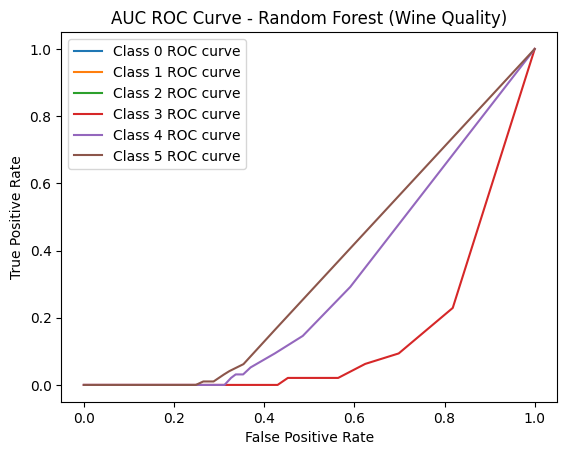

In [ ]:
if len(np.unique(y_test)) > 2:
    y_prob = rf.predict_proba(X_test)
    for i in range(y_prob.shape[1]):
        fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} ROC curve")
else:
    roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"AUC ROC (area = {roc_auc_rf:.2f})")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve - Random Forest (Wine Quality)')
plt.legend(loc='best')
plt.show()

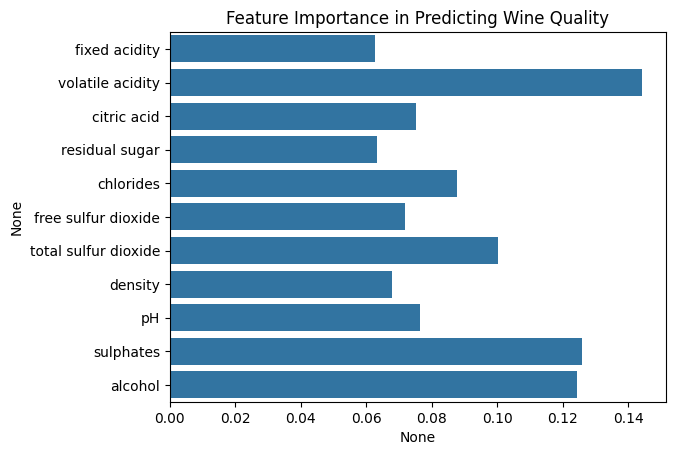

In [ ]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance in Predicting Wine Quality')
plt.show()